In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lasagne
import theano
import theano.tensor as T
import seaborn

from robo.models.lcnet.model import get_lc_net
from robo.models.lcnet.basis_functions import pow_func, exponential, hill_3, log_power, vapor_pressure

seaborn.set_style(style='whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', size=15.0, family='serif')
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [2]:
# Sample a network with random weights
network = get_lc_net(5)
l = lasagne.layers.get_all_layers(network)[:7]

# Sample random configurations uniformly
p = []
N = 1000
n_epochs = 100

configs = np.random.rand(N, 4)

# Normalize inputs to be zero mean and unit variance
configs = (configs - np.mean(configs, axis=0)) / np.std(configs, axis=0)
           
# Add epochs
t_grid = np.linspace(1, n_epochs, n_epochs) / n_epochs
x = np.concatenate((np.repeat(configs, n_epochs, axis=0), np.tile(t_grid , N)[:, None]), axis=1)

all_outputs = lasagne.layers.get_output(l, x)

# Compute thetas for basis functions
thetas = all_outputs[-1].eval()
thetas = thetas.reshape(N, n_epochs, 13)


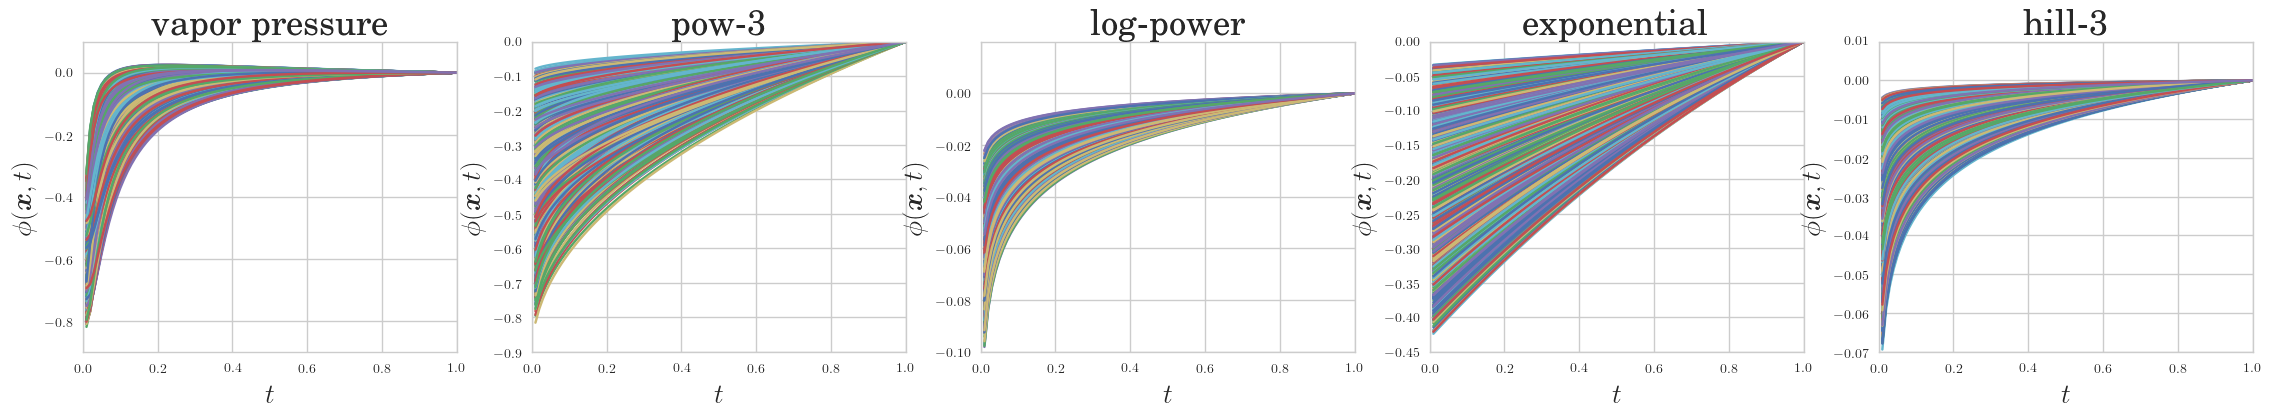

In [3]:
fig = plt.figure(figsize=(28,4))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

for i in range(N):

    phi = [vapor_pressure(t, thetas[i, t_idx, 0], thetas[i, t_idx, 1], thetas[i, t_idx, 2]) for t_idx, t in enumerate(t_grid)]
    
    ax1.plot(t_grid, phi)
    ax1.set_xlabel(r"$t$", fontsize=20)
    ax1.set_ylabel(r"$\phi(\boldsymbol{x}, t)$", fontsize=20)
    ax1.set_title("vapor pressure", fontsize=25)

    phi = [pow_func(t, thetas[i, t_idx, 3], thetas[i, t_idx, 4]) for t_idx, t in enumerate(t_grid)]

    ax2.plot(t_grid, phi)
    ax2.set_xlabel(r"$t$", fontsize=20)
    ax2.set_ylabel(r"$\phi(\boldsymbol{x}, t)$", fontsize=20)
    ax2.set_title("pow-3", fontsize=25)

    phi = [log_power(t, thetas[i, t_idx, 5], thetas[i, t_idx, 6], thetas[i, t_idx, 7]) for t_idx, t in enumerate(t_grid)]

    ax3.plot(t_grid, phi)
    ax3.set_xlabel(r"$t$", fontsize=20)
    ax3.set_ylabel(r"$\phi(\boldsymbol{x}, t)$", fontsize=20)
    ax3.set_title("log-power", fontsize=25)

    phi = [exponential(t, thetas[i, t_idx, 8], thetas[i, t_idx, 9]) for t_idx, t in enumerate(t_grid)]

    ax4.plot(t_grid, phi)
    ax4.set_xlabel(r"$t$", fontsize=20)
    ax4.set_ylabel(r"$\phi(\boldsymbol{x}, t)$", fontsize=20)
    ax4.set_title("exponential", fontsize=25)  

    phi = [hill_3(t, thetas[i, t_idx, 10], thetas[i, t_idx, 11], thetas[i, t_idx, 12]) for t_idx, t in enumerate(t_grid)]

    ax5.plot(t_grid, phi)
    ax5.set_xlabel(r"$t$", fontsize=20)
    ax5.set_ylabel(r"$\phi(\boldsymbol{x}, t)$", fontsize=20)
    ax5.set_title("hill-3", fontsize=25)  
    
plt.show()